In [12]:
import os
NBFDIR = os.path.dirname(os.path.realpath('__file__'))
import pandas as pd
from mf_modules.j_header import markdown_header

# Making a RunApp widget from a Script

## What will you need? 
- a script! 
- an input file (json or csv)
- a config file (this is generated by the RunApp class)
- a notebook to keep the RunApp in (this note in this example). 

## Preparing the Script

The script must do the following to work correctly with RunApp:
- Have a __Google Style docstring__ (this becomes the UserGuide)
- Have a __dictionary of outputs__ of the script that are defined in the script and read by the RunApp to inform the default configuration.
- Have an __inputs parser__ that reads the inputs and config files that are passed to the script with scripts are run using RunApp. 

### Google Style docstring
- module level docstring. this becomes the user guide. it is based upon the Google Docstring Style Guide. 
- images can also be to the docstring and will be displayed in the guide



#### Example Docstring that uses Google Style

In [13]:

from ipyrun._ipydisplayfile import DisplayFile
fpth_script = r'..\scripts\expansion_vessel_sizing.py'
d = DisplayFile(fpth_script)
d.preview_fpth()

Output()

### Default outputs dict

A fundamental principle of the RunApp is that when a script is executed, it generates output files.  
The names and locations of these output files can be overriden, but will default to a developer defined configuration that ideally doesn't need to be modified by the user. 

The RunApp will look for a dict called `script_outputs` in the script. 
The dict is simple a set of keys (ideally enumerated strings), where the value is another dict with the following keys: 'fdir' ,'fnm' , 'description'.  
___Note___. a dict rather than a list is used as the user can then more easily overide selected outputs while leaving the the rest as default.

See below for example:

_in this example, an output file, expansion_vessel_sizing.csv will be dumped next to the notebook where the script is executed from._



In [14]:
script_outputs = {
    '0': {
        'fdir':'.', # relative to the location of the App / Notebook file
        'fnm': r'expansion_vessel_sizing.csv',
        'description': "a simple calc for sizing expansion vessels. could be expanded to size many vessels."
    }
}

# for the interest of the developer reading this tutorial - 
# data from a python file can be extracted like this. 
# this give the developer the ability to define how and where the output files 
# should be placed in the job folder at the time of making the script. 
import importlib.util
spec = importlib.util.spec_from_file_location(os.path.splitext(os.path.basename(fpth_script))[0], fpth_script)
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

script_outputs_from_file = foo.script_outputs

from pprint import pprint
pprint(script_outputs)

print(script_outputs == script_outputs_from_file)

{'0': {'description': 'a simple calc for sizing expansion vessels. could be '
                      'expanded to size many vessels.',
       'fdir': '.',
       'fnm': 'expansion_vessel_sizing.csv'}}
True


### Inputs parser

the script is executed by subprocess on the command line as default. 
the following command is executed:

`subprocess.check_output(['python','-O', self.config['fpth_script'], self.config['fpth_config'], self.config['fpth_inputs']])`

which is equivalent to excuting the following on the command line from within an the appropriate conda environment:

`python -O fpth_script fpth_config fpth_inputs`

so within the script `if __name__ = '__main__'`, there needs to be code to unpack the inputs and config files and use them to run the
appropriate classes and functions within the script and then output the files that result from the script.

The user-inputs to the script used to execute the process come from the _fpth_inputs_.   
The configuration which defines the output filepaths comes from the _fpth_config__. 

__We'll come back to this__ after we've built the inputs dicts that the script needs to run. 

## Creating the inputs file (fpth_inputs)

### Build an Input Form / User Interface using EditListOfDicts

see docentation below

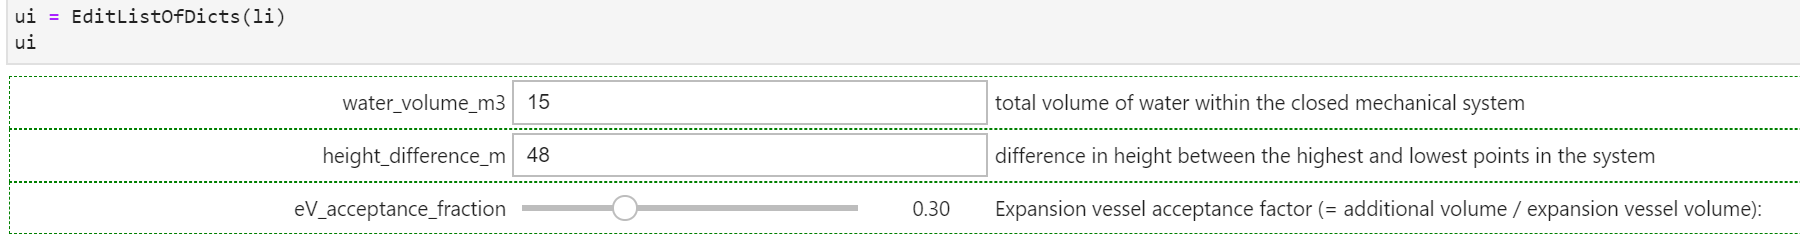


# EditListOfDicts.__init__
```python
def __init__(self, li):
```

---


class that builds a user interface based on a list of dicts, where each dict is 
a ipywidget user interface object. The class inteprets which widget to select based on the 
type of the value and the keys that are passed. The keys are passed to the ipywidget 
object as **kwargs.

## Args
* **li** (list) : list of dicts. each dict must contain 'name', 'value' and 'label' as the 
    minimum set of keys for making a ipywidget. additional keys that are passed 
    get become **kwargs that are passed to the selected ipywidget
    

## Example
```
li = [
        {
            'name':'water_volume_m3',
            'value':15,
            'label':'total volume of water within the closed mechanical system'
        },
        {
            'name':'height_difference_m',
            'value':48,
            'label':'difference in height between the highest and lowest points in the system'
        },
        {
            'name':'eV_acceptance_fraction',
            'value':0.3,
            'min':0,
            'max':1,
            'label':'Expansion vessel acceptance factor (= additional volume / expansion vessel volume):'
        }
    ]
```


```python

>>> ui = EditListOfDicts(li)
>>> ui
see example image above
```
---
Images:
    %mf_root%\ipyrun\docs\images\eg_ui.PNG


## Source
```python
def __init__(self, li):

```



In [15]:
from ipyrun._ipyeditjson import EditListOfDicts
from mf_modules.mydocstring_display import display_module_docstring, display_function_docstring, docstring_img_list
import sys

fpth = sys.modules['ipyrun._ipyeditjson'].__file__
function_name = 'EditListOfDicts.__init__'

display_function_docstring(fpth, function_name)
# note - the same info can be accessed like this:
# help(EditListOfDicts)

following the guidance above, and adding a few additional parameters, we get the following:

In [16]:

inputs = [
    {
        'name':'water_volume_m3',
        'value':15,
        'label':'total volume of water within the closed mechanical system'
    },
    {
        'name':'height_difference_m',
        'value':48,
        'label':'difference in height between the highest and lowest points in the system'
    },
    {
        'name':'eV_acceptance_fraction',
        'value':0.3,
        'min':0,
        'max':1,
        'label':'Expansion vessel acceptance factor (= additional volume / expansion vessel volume):'
    },
    {
        'name':'pipework_length_m',
        'value':257,
        'label':'Heating system pipework length (m). Note: includes horizontal, vertical, flow and return.'
    },
    {
        'name':'pipework_pressure_loss_pa_per_m',
        'value':500,
        'label':'effective pipework pressure loss (Pa/m)'
    },
    {
        'name':'pipework_pressure_loss_margin_fraction',
        'value':1,
        'label':'sensitivity factor',
        'min':0,
        'max':2
    },
    {
        'name':'margin_1_bar',
        'value':0.3,
        'label':'From BS7074. The max between this and: 0.15 * static_pressure_barg  is used (Paul Button rule of thumb)',
        'min':0,
        'max':1
    }
]


ui = EditListOfDicts(inputs)
ui

Output()

Output()

Output()

Output()

Output()

Output()

Output()

## Write the inputs file to json

the above demonstrates what the user interface will look like. it looks good!  
if we save this as a json file next to the script, the RunApp will automatically find it and use it to build the interface above. 

### creating a template input file:
- the template version of this file __must__ be saved in `r'.\template_inputs'` (i.e. next to the script / notebook file)
- the name of the template input file __must__ be inputs-[name of the script here].
    - e.g. if the script file is here:  
    `..scripts\expansion_vessel_sizing.py`  
    then the template file __must__ be saved here:  
    `..scripts\template_inputs\inputs-expansion_vessel_sizing.json`  
    if you want to have multiple different options for template inputs, then simply enumerate the inputs filename:  
    `..scripts\template_inputs\inputs-expansion_vessel_sizing-1.json`

In [17]:
import os
from mf_modules.pydtype_operations import write_json
from mf_modules.file_operations import make_dir
#help(write_json)

fdir = r'..\scripts\template_inputs'
make_dir(fdir) # make sure the dir exists
fnm = 'inputs-expansion_vessel_sizing.json' # the name of the template input file must match the name of the script / notebook file
fpth = write_json(inputs, fpth=os.path.join(fdir,fnm))

..\scripts\template_inputs\inputs-expansion_vessel_sizing.json


## Initiate the RunApp

The RunApp will build an interface to the run the script. It needs to be passed a configuration dict to be initiated. By design, you should pass as little as possible, and the RunApp will automatically create a file-structure around the Notebook to store data. These default values can be overridden in the inital call but this should generally be avoided. 

In [18]:
from ipyrun.ipyrun import RunApp
help(RunApp.__init__)

Help on function __init__ in module ipyrun.ipyrun:

__init__(self, config)
    class that builds a user interface for:
    - editing inputs, 
    - running a script, 
    - reviewing the files output by the script
    - maintaining a log of when the script was last run, by who, and what the inputs were
    - allows users to reload previous input runs. 
    
    Args:
        config (dict): a dict that defines the script path, inputs path, archive inputs path, 
            log file path, output paths etc. this class inherits the RunConfig class which 
            has a default configuration for all of these things allowing the user to pass minimal 
            amounts of information to setup. 
            
    Example:
        ```
        config={
            'fpth_script':os.path.join(os.environ['mf_root'],r'MF_Toolbox\dev\mf_scripts\docx_to_pdf.py'),
            'fdir':FDIR,
            }    
    
        r = RunApp(config) 
        from ipyrun._ipyeditjson import EditListOfDicts
    

The example in the docstring above demonstrates the minimum amount of information that can be passed

In [19]:
config={
    'fpth_script':os.path.realpath(fpth_script),
    'fdir':NBFDIR,
    }  
r = RunApp(config)
r 

Output()

And Voila! We have a simple interface for running scripts!  

It is worth noting, when the config is passed to the RunApp, the first thing that happens is it is updated with default values.  
so after initialising the RunApp with:

In [20]:
config={
    'fpth_script':os.path.realpath(fpth_script),
    'fdir':NBFDIR,
    } 
pprint(config)

{'fdir': 'C:\\engDev\\git_mf\\ipyrun\\examples\\notebooks',
 'fpth_script': 'C:\\engDev\\git_mf\\ipyrun\\examples\\scripts\\expansion_vessel_sizing.py'}


a default file structure for the RunApp is generated as follows:


In [21]:
pprint(r.config)

{'fdir': 'C:\\engDev\\git_mf\\ipyrun\\examples\\notebooks',
 'fdir_config': 'C:\\engDev\\git_mf\\ipyrun\\examples\\notebooks\\appdata\\config',
 'fdir_inputs': 'C:\\engDev\\git_mf\\ipyrun\\examples\\notebooks\\appdata\\inputs',
 'fdir_inputs_archive': 'C:\\engDev\\git_mf\\ipyrun\\examples\\notebooks\\appdata\\inputs\\archive',
 'fdir_log': 'C:\\engDev\\git_mf\\ipyrun\\examples\\notebooks\\appdata\\log',
 'fdir_outputs': ['C:\\engDev\\git_mf\\ipyrun\\examples\\notebooks'],
 'fnm_config': 'config-expansion_vessel_sizing.json',
 'fnm_log': 'log-expansion_vessel_sizing.csv',
 'fpth_config': 'C:\\engDev\\git_mf\\ipyrun\\examples\\notebooks\\appdata\\config\\config-expansion_vessel_sizing.json',
 'fpth_inputs': 'C:\\engDev\\git_mf\\ipyrun\\examples\\notebooks\\appdata\\inputs\\inputs-expansion_vessel_sizing.json',
 'fpth_inputs_options': {'project': {'fdir': 'C:\\engDev\\git_mf\\ipyrun\\examples\\notebooks\\appdata\\inputs',
                                     'fpths': ['C:\\engDev\\git_mf\

This enables us to continuously added new scripts in an incremental fashion, ensuring that the outputs can be found in a consistent locations in the job folder, with consistent named. This should make it easier to create chains or workflows and will also allow for tracking and analytics. 

## Back to the inputs parser!

we haven't yet written the code within the script to unpack the data files that are passed to the script as arguments. 
This code will look almost identical for every script, with minor modifications relating to how the inputs are reformatted to be passed to the functions of the script. 
our example looks like this, this can serve as a template for all other scripts used in this way:

```Python

if __name__ == '__main__':

    if __debug__ == True:
        # you can hard-code some tests for fpth_config and fpth_inputs below.
        import sys
        import os
        fpth_config = r'C:\engDev\git_mf\ipyrun\examples\notebooks\appdata\config\config-expansion_vessel_sizing.json'#sys.argv[1]
        fpth_inputs = r'C:\engDev\git_mf\ipyrun\examples\notebooks\appdata\inputs\inputs-expansion_vessel_sizing.json'# sys.argv[2]
        print('fpth_script: {0}'.format(sys.argv[0]))
        print('fpth_config: {0}'.format(fpth_config))
        print('fpth_inputs: {0}'.format(fpth_inputs))
        from mf_modules.pydtype_operations import read_json
        from mf_modules.file_operations import make_dir

        # get config and input data
        # config
        config = read_json(fpth_config)
        os.chdir(config['fdir']) # change the working dir to the app that is executing the script
        outputs = config['fpths_outputs']
        [make_dir(fdir) for fdir in config['fdir_outputs']]
        # inputs
        inputs = read_json(fpth_inputs)

        # this is the only bit that will change between scripts
        calc_inputs = {}
        [calc_inputs.update({l['name']:l['value']}) for l in inputs];
        main(calc_inputs,outputs)
        print('done')


    else:
        # this is the bit that will be executed by the script
        import sys
        import os
        fpth_config = sys.argv[1]
        fpth_inputs = sys.argv[2]
        print('fpth_script: {0}'.format(sys.argv[0]))
        print('fpth_config: {0}'.format(fpth_config))
        print('fpth_inputs: {0}'.format(fpth_inputs))
        from mf_modules.pydtype_operations import read_json
        from mf_modules.file_operations import make_dir

        # get config and input data
        # config
        config = read_json(fpth_config)
        os.chdir(config['fdir']) # change the working dir to the app that is executing the script
        outputs = config['fpths_outputs']
        [make_dir(fdir) for fdir in config['fdir_outputs']]
        # inputs
        inputs = read_json(fpth_inputs)

        # this is the only bit that will change between scripts
        calc_inputs = {}
        [calc_inputs.update({l['name']:l['value']}) for l in inputs];
        df = main(calc_inputs,outputs)
        print('done')

```

## Finished!

Next we will look at creating batches of scripts and extending behaviour of RunApp objects to create bespoke configurations. 


In [22]:
# it is now good to go!
config={
    'fpth_script':os.path.realpath(fpth_script),
    'fdir':NBFDIR,
    }  
r = RunApp(config)
r 

Output()